<a href="https://colab.research.google.com/github/hiid0726/MachineLearning/blob/main/hiid0726/ch08_ML_06_RandomForest_ym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
# https://github.com/BigData23th/Data/raw/main/car.csv
df = pd.read_csv("https://github.com/BigData23th/Data/raw/main/car.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [3]:
pd.options.display.float_format = "{:.4f}".format
df.describe()

,year,selling_price,km_driven,seats
count,8128.0000,8128.0000,8128.0000,7907.0000
mean,2013.8040,638271.8077,69819.5108,5.4167
std,4.0442,806253.4035,56550.5550,0.9596
min,1983.0000,29999.0000,1.0000,2.0000
25%,2011.0000,254999.0000,35000.0000,5.0000
50%,2015.0000,450000.0000,60000.0000,5.0000
75%,2017.0000,675000.0000,98000.0000,5.0000
max,2020.0000,10000000.0000,2360457.0000,14.0000


In [4]:
df.describe(include='O')
# 1. 명목형 변수
# 2. 대표값을 넣어서 처리
# * 단위가 뒤어붙어서 실제로는 실수형인데 문자(Object) 취급을 받고 있는 열
# -> 단위가 통일이 되어 있으면 문제 X, 단위가 다르면? => 통일시켜주고 숫자로.

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


# 전처리

<Axes: >

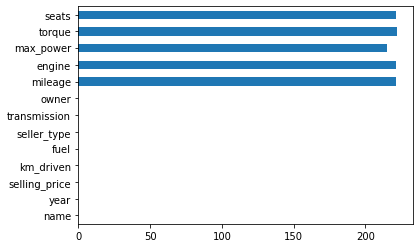

In [7]:
# 결측치
df.isnull().sum().plot(kind='barh')

In [8]:
# 결측치별 비중
# 2~3%. drop? 최빈값/평균값 대표값...
df.isnull().sum() / len(df)

name            0.0000
year            0.0000
selling_price   0.0000
km_driven       0.0000
fuel            0.0000
seller_type     0.0000
transmission    0.0000
owner           0.0000
mileage         0.0272
engine          0.0272
max_power       0.0265
torque          0.0273
seats           0.0272
dtype: float64

## 단위 처리
* 실수형인데 단위 때문에 범주형으로 분류되는 데이터들을 실수형으로 바꿔주는 작업
* `mileage` / `engine` / `max_power` / `torque`

### Engine

In [11]:
# 단위가 CC로 통일 -> 일괄적으로 제거해준다음에 변환
# 단순일괄처리 -> nan이 껴져 있어서 조금 까다로움
df.engine.value_counts()

1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2835 CC       1
1489 CC       1
1422 CC       1
2496 CC       1
1950 CC       1
Name: engine, Length: 121, dtype: int64

In [12]:
# {숫자값} CC
# df.{칼럼명}.str : (행 단위로) 문자열을 처리하는 메소드(함수)를 불러올 수 있음
# ...str.split() # 리스트로 쪼개짐 -> 행 안에
df.engine.str.split() # 행 안에 스페이스를 기준으로 쪼개준다.

0       [1248, CC]
1       [1498, CC]
2       [1497, CC]
3       [1396, CC]
4       [1298, CC]
           ...    
8123    [1197, CC]
8124    [1493, CC]
8125    [1248, CC]
8126    [1396, CC]
8127    [1396, CC]
Name: engine, Length: 8128, dtype: object

In [17]:
# ...str.split(expand=True) # 열로 쪼개짐
# 0번째 열만 선택해서 새롭게 engine 값으로 넣어주면 되겠네?
df.engine.str.split(expand=True)[0]

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: 0, Length: 8128, dtype: object

In [18]:
df[['engine','engine_unit']] = df.engine.str.split(expand=True) # 리스트 언팩킹

In [20]:
df.engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [23]:
# ...astype(변환시켜줄 타입)
df.engine.astype(float)

0      1248.0000
1      1498.0000
2      1497.0000
3      1396.0000
4      1298.0000
          ...   
8123   1197.0000
8124   1493.0000
8125   1248.0000
8126   1396.0000
8127   1396.0000
Name: engine, Length: 8128, dtype: float64

In [24]:
df.engine = df.engine.astype('float32')
df.engine

0      1248.0000
1      1498.0000
2      1497.0000
3      1396.0000
4      1298.0000
          ...   
8123   1197.0000
8124   1493.0000
8125   1248.0000
8126   1396.0000
8127   1396.0000
Name: engine, Length: 8128, dtype: float32

In [25]:
df.engine_unit.unique()

array(['CC', nan], dtype=object)

In [26]:
df.drop('engine_unit', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float32
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float32(1), float64(1), int64(3), object(8)
memory usage: 793.9+ KB


In [27]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Max Power

In [29]:
df.max_power.head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [ ]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp',
       '88.5 bhp', '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp',
       '88.8 bhp', '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp',
       '34.2 bhp', '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp',
       '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp',
       '187.74 bhp', '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp',
       '108.495 bhp', '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp',
       '189 bhp', '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp',
       '81.80 bhp', '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp',
       '155 bhp', '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp',
       '126.2 bhp', '98.

In [30]:
df.max_power.str.split(expand=True).head()

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp


In [31]:
df[['max_power', 'max_power_unit']] = df.max_power.str.split(expand=True)

In [32]:
df[['max_power', 'max_power_unit']].head()

,max_power,max_power_unit
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp


In [33]:
try:
    df.max_power = df.max_power.astype('float32')
except Exception as e:
    print(type(e))
    print(e)

<class 'ValueError'>
could not convert string to float: 'bhp'


In [34]:
# df.max_power[df.max_power == 'bhp']
df[df.max_power == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0000,bhp,NaN,8.0000,None


In [35]:
def handle_float(value):
    try:
        return float(value)
    # except:
    except ValueError: # ValueError로 에러 대응을 한정
        return np.NaN # 결측치

In [36]:
# 직접 정의한 타입 변환 함수를 사용해서 만약 ValueError가 나도 잘 처리될 수 있게
df.max_power = df.max_power.apply(handle_float) # axis=0 -> 행 기준으로 처리

In [37]:
df.max_power

0       74.0000
1      103.5200
2       78.0000
3       90.0000
4       88.2000
         ...   
8123    82.8500
8124   110.0000
8125    73.9000
8126    70.0000
8127    70.0000
Name: max_power, Length: 8128, dtype: float64

In [39]:
# df2 = df.copy()
df2 = pd.read_csv("https://github.com/BigData23th/Data/raw/main/car.csv")
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000


In [40]:
# str -> 문자열 / titanic -> extract -> 정규표현식
# * : 0개 이상 -> 빈칸도 잡아줌 / + : 1개 이상 : 빈칸은 제외
# https://regexr.com -> ([\d\.]+) <- 숫자.소수점 같이 뽑아내는 식
df2.max_power.str.extract("([\d\.]+)").astype('float')

,0
0,74.0000
1,103.5200
2,78.0000
3,90.0000
4,88.2000
...,...
8123,82.8500
8124,110.0000
8125,73.9000
8126,70.0000


In [41]:
df.max_power_unit.unique() # 0

array(['bhp', nan, None], dtype=object)

In [ ]:
df.drop('max_power_unit', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float32
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float32(1), float64(2), int64(3), object(7)
memory usage: 793.9+ KB


### Mileage

In [ ]:
df.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [42]:
df[['mileage', 'mileage_unit']] = df.mileage.str.split(expand=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit,mileage_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0000,74.0000,190Nm@ 2000rpm,5.0000,bhp,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0000,103.5200,250Nm@ 1500-2500rpm,5.0000,bhp,kmpl
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0000,78.0000,"12.7@ 2,700(kgm@ rpm)",5.0000,bhp,kmpl
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0000,90.0000,22.4 kgm at 1750-2750rpm,5.0000,bhp,kmpl
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0000,88.2000,"11.5@ 4,500(kgm@ rpm)",5.0000,bhp,kmpl


In [43]:
df.mileage = df.mileage.astype('float32')
df.mileage.head()

0   23.4000
1   21.1400
2   17.7000
3   23.0000
4   16.1000
Name: mileage, dtype: float32

In [44]:
df.mileage_unit.unique()

array(['kmpl', 'km/kg', nan], dtype=object)

In [45]:
# km/l (액체 연료-가솔린, 디젤), km/kg (기체 연료-LPG, CNG)
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [46]:
df.fuel[df.mileage_unit == 'kmpl'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [47]:
df.fuel[df.mileage_unit == 'km/kg'].unique()

array(['LPG', 'CNG'], dtype=object)

In [48]:
fuels = {
    'Petrol': 80.43,
    'Diesel': 73.56,
    'LPG': 40.85,
    'CNG': 44.23
}

In [49]:
# fuels -> 딕셔너리 => map
# df.fuel.map(fuels) -> 단위당(L 혹은 KM) 소모되는 금액($)
df.mileage / df.fuel.map(fuels) # 1km 당 필요한 금액

0      0.3181
1      0.2874
2      0.2201
3      0.3127
4      0.2002
        ...  
8123   0.2300
8124   0.2284
8125   0.2624
8126   0.3204
8127   0.3204
Length: 8128, dtype: float64

In [50]:
# df.apply(function axis=1) : 행이 갖고 있는 열을 다 쓸 수 있음
def handle_mileage(row):
    # fuels[row.fuel] -> fules에서 행의 fuel값을 key값으로 value를 찾겠다
    return row.mileage / fuels[row.fuel]

In [51]:
df.mileage = df.apply(handle_mileage, axis=1)
df.mileage.head()

0   0.3181
1   0.2874
2   0.2201
3   0.3127
4   0.2002
Name: mileage, dtype: float64

In [52]:
df.drop('mileage_unit', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float32
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float32(1), float64(3), int64(3), object(6)
memory usage: 793.9+ KB


### Torque

In [ ]:
df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [58]:
df.torque.unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [57]:
# 단위(unit)를 추출하기 위한 함수 정의
# df.torque.apply(handle_torque_unit)
def handle_torque_unit(x):
    if 'NM' in str(x): # x라는 문자열에 'NM'이 포함되어 있다면
        return 'Nm' # 단위 (return -> 함수를 종료)
    # elif...
    if 'KGM' in str(x):
        return 'kgm'
    # return None

In [59]:
df['torque_unit'] = df.torque.str.upper().apply(handle_torque_unit)

In [60]:
df['torque_unit'].unique() # None ->

array(['Nm', 'kgm', None], dtype=object)

In [61]:
df[df.torque_unit.isna()].torque.unique()
# 원래부터 결측치 : nan
# kgm, Nm 없어서 None -> 나머지값들
# 100보다 큰 값들

array([nan, '250@ 1250-5000rpm', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

In [63]:
df[df['torque_unit'] == 'Nm'].torque # 100단위

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
5           113.75nm@ 4000rpm
7               59Nm@ 2500rpm
8         170Nm@ 1800-2400rpm
                ...          
8122    219.7Nm@ 1500-2750rpm
8123         113.7Nm@ 4000rpm
8125           190Nm@ 2000rpm
8126      140Nm@ 1800-3000rpm
8127      140Nm@ 1800-3000rpm
Name: torque, Length: 7390, dtype: object

In [62]:
df[df['torque_unit'] == 'kgm'].torque # 10단위

2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
6            7.8@ 4,500(kgm@ rpm)
17       22.4 kgm at 1750-2750rpm
                  ...            
8082        16.3@ 2,000(kgm@ rpm)
8104        13.5@ 4,800(kgm@ rpm)
8105             11.3kgm@ 4700rpm
8113    20.4@ 1400-3400(kgm@ rpm)
8124    24@ 1,900-2,750(kgm@ rpm)
Name: torque, Length: 504, dtype: object

In [ ]:
df.torque_unit.fillna('Nm', inplace=True) # torque_unit의 결측치를 Nm를 채움 (inplace->원본에 반영)

In [ ]:
df.torque_unit.unique()

array(['Nm', 'kgm'], dtype=object)

In [64]:
# 단위 추출한 이유 -> 단위별로 값이 달라서 나중에 곱해줘서 처리
# torque -> float로 변환해주기 위한 작업
df.torque.str.extract("([\d\.]+)").astype('float')
# extract(조건-정규표현식) : 특정 조건을 만족시키는 문자열 첫번째를 반환
# 포함여부를 T/F -> contains

,0
0,190.0000
1,250.0000
2,12.7000
3,22.4000
4,11.5000
...,...
8123,113.7000
8124,24.0000
8125,190.0000
8126,140.0000


In [65]:
# extractall(조건-정규표현식) : 특정 조건을 만족시키는 문자열 모두를
df.torque.str.extractall("([\d\.]+)").astype('float')

0
     match          
0    0      190.0000
     1     2000.0000
1    0      250.0000
     1     1500.0000
     2     2500.0000
...              ...
8126 1     1800.0000
     2     3000.0000
8127 0      140.0000
     1     1800.0000
     2     3000.0000

[18874 rows x 1 columns]

In [66]:
# torque에 가장 먼저 존재하는 숫자들만 남기고 삭제
df.torque = df.torque.str.extract("([\d\.]+)").astype('float')
df.torque.head()

0   190.0000
1   250.0000
2    12.7000
3    22.4000
4    11.5000
Name: torque, dtype: float64

In [67]:
# torque : 회전력
# torque -> unit -> torque / extract -> 첫번째 등장하는 숫자들 + unit
# 1 kgm = 9.8066 Nm -> kgm 으로 표현되어 있는 걸 Nm 기준으로 수정
# 단위 변환
# df.apply(..., axis=1)
def handle_torque_trans(x):
    if x.torque_unit == 'kgm':
        return x.torque * 9.8066 # kgm -> Nm
    return x.torque # Nm -> Nm
    # return x.torque * 9.8066 if x.torque_unit == 'kgm' else x.torque

In [68]:
df.torque = df.apply(handle_torque_trans, axis=1)

In [69]:
df.torque.head()

0   190.0000
1   250.0000
2   124.5438
3   219.6678
4   112.7759
Name: torque, dtype: float64

In [70]:
df.drop('torque_unit', axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   float64
 9   engine          7907 non-null   float32
 10  max_power       7912 non-null   float64
 11  torque          7906 non-null   float64
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
dtypes: float32(1), float64(4), int64(3), object(6)
memory usage: 857.4+ KB


## Name

In [ ]:
# df.name.value_counts()
# df.name.nunique()
df.name.unique()
# 제조사 혹은 브랜드만 추출해서 사용

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [72]:
# 맨 첫 단어만 -> 여백으로 구분된 여러 단어중에 하나만 쪼개서 가져옴
df.name = df.name.str.split(expand=True)[0] # 0번째만 가져옴

In [ ]:
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
# replace -> 교체한다
df.name = df.name.replace('Land', 'Land Rover')
df.name.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land Rover', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

## 결측치

<Axes: >

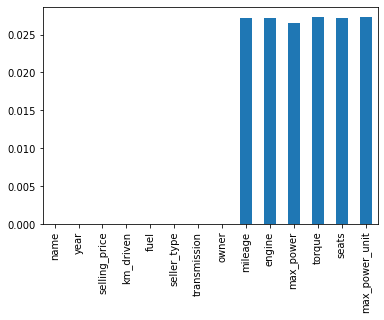

In [73]:
# 결측치의 평균 = 비중
df.isna().mean()
df.isna().mean().plot.bar()

In [74]:
df.dropna(inplace=True) # 평균치, 최빈값으로 치환해도 됨 / 그룹별로 넣거나 / 트리->결측치는 대표하는 -1, -99

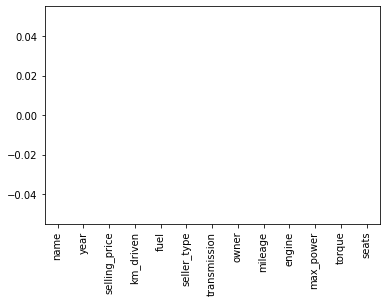

In [ ]:
df.isna().mean().plot.bar()

## 더미 변수

In [ ]:
df.describe(include=['O'])

,name,fuel,seller_type,transmission,owner
count,7906,7906,7906,7906,7906
unique,31,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,2367,4299,6563,6865,5215


In [75]:
o_columns = df.describe(include=['O']).columns

In [76]:
df = pd.get_dummies(df, columns=o_columns,
                    drop_first=True)
df

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.3181,1248.0000,74.0000,190.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.2874,1498.0000,103.5200,250.0000,5.0000,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.2201,1497.0000,78.0000,124.5438,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.3127,1396.0000,90.0000,219.6678,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.2002,1298.0000,88.2000,112.7759,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.2300,1197.0000,82.8500,113.7000,5.0000,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,0.2284,1493.0000,110.0000,235.3584,5.0000,0,0,...,1,0,0,1,0,1,1,0,0,0
8125,2009,382000,120000,0.2624,1248.0000,73.9000,190.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,0.3204,1396.0000,70.0000,140.0000,5.0000,0,0,...,1,0,0,1,0,1,0,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage                       7906 non-null   float64
 4   engine                        7906 non-null   float32
 5   max_power                     7906 non-null   float64
 6   torque                        7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   name_Ashok                    7906 non-null   uint8  
 9   name_Audi                     7906 non-null   uint8  
 10  name_BMW                      7906 non-null   uint8  
 11  name_Chevrolet                7906 non-null   uint8  
 12  name_Daewoo                   7906 non-null   uint8  
 13  nam

## 훈련셋 & 시험셋

In [78]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info() # selling_price 목표값, 종속변수 y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          7906 non-null   int64  
 1   selling_price                 7906 non-null   int64  
 2   km_driven                     7906 non-null   int64  
 3   mileage                       7906 non-null   float64
 4   engine                        7906 non-null   float32
 5   max_power                     7906 non-null   float64
 6   torque                        7906 non-null   float64
 7   seats                         7906 non-null   float64
 8   name_Ashok                    7906 non-null   uint8  
 9   name_Audi                     7906 non-null   uint8  
 10  name_BMW                      7906 non-null   uint8  
 11  name_Chevrolet                7906 non-null   uint8  
 12  name_Daewoo                   7906 non-null   uint8  
 13  nam

In [79]:
X = df.drop('selling_price', axis=1)
y = df.selling_price

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22
)

# 모델링 및 평가

In [81]:
# 연속형 : RandomForestRegressor
# 범주형 : RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [82]:
model = RandomForestRegressor(random_state=22)

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=22)

In [84]:
# 훈련셋 예측 -> 과최적화, 과적합 (Over-fitting)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test) # 시험셋 예측
# 1. train_pred은 높은데 test_pred는 그만큼 안높을 때 (오버피팅)
# 2. train_pred가 낮을 때 (언더피팅)

In [85]:
from sklearn.metrics import mean_squared_error

print(
    f"train_rmse : {mean_squared_error(y_train, train_pred, squared=False)}",
    f"test_rmse : {mean_squared_error(y_test, test_pred, squared=False)}",
)

# train_test_split -> 어떻게 뽑히냐에 따라서 모델/시험에 모두 영향

train_rmse : 56908.89876028095 test_rmse : 115475.75458024719


## K-Fold 교차검증
* 교차검증 : `train_test_split` 훈련셋 & 시험셋 -> random_state. ??? 1버전의 훈련셋?<br> 다양한 훈련셋/시험셋을 통해서 모델의 신뢰성을 높이기 위한 평가 과정
* K-폴드 교차검증 : 데이터를 K개를 쪼개어 그 중에 하나를 시험셋으로 선택하는 과정을 반복 -> 평균치.

| A | B | C | D | E |
|-|-|-|-|-|
|훈|훈|훈|훈|시|
|훈|훈|훈|시|훈|
|훈|훈|시|훈|훈|
|훈|시|훈|훈|훈|
|시|훈|훈|훈|훈|

=> accurance_score? rmse? => 평균

* https://continuous-development.tistory.com/166?category=736685

In [86]:
from sklearn.model_selection import KFold

In [ ]:
# K Fold는 index를 기준으로 나눠줌
df.index # 삭제된 인덱스 자리가 있음

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125, 8126, 8127],
           dtype='int64', length=7906)

In [87]:
df.reset_index() # 인덱스가 열로 빠져나오고, 정수 인덱스가 새로 지정됨
df.reset_index(drop=True) # 인덱스가 바로 삭제되고, ...
df.reset_index(drop=True, inplace=True) # 바로 원본을 바꾸고 싶다

In [ ]:
df.index

RangeIndex(start=0, stop=7906, step=1)

In [88]:
# kf = KFold()
kf = KFold(n_splits=5)

In [89]:
X = df.drop('selling_price', axis=1)
y = df.selling_price

In [90]:
list(kf.split(X))

[(array([1582, 1583, 1584, ..., 7903, 7904, 7905]),
  array([   0,    1,    2, ..., 1579, 1580, 1581])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([1582, 1583, 1584, ..., 3160, 3161, 3162])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([3163, 3164, 3165, ..., 4741, 4742, 4743])),
 (array([   0,    1,    2, ..., 7903, 7904, 7905]),
  array([4744, 4745, 4746, ..., 6322, 6323, 6324])),
 (array([   0,    1,    2, ..., 6322, 6323, 6324]),
  array([6325, 6326, 6327, ..., 7903, 7904, 7905]))]

In [91]:
# unpacking -> 나열된 n개 이상의 데이터 => n개만큼 변수를 주면
# 해당 변수로 대입되서 처리
for i, j in kf.split(X):
    print(f"i : {i}") # 훈련셋으로 쓰일 데이터의 인덱스
    print(f"j : {j}") # 시험셋으로 쓰일 데이터의 인덱스

i : [1582 1583 1584 ... 7903 7904 7905]
j : [   0    1    2 ... 1579 1580 1581]
i : [   0    1    2 ... 7903 7904 7905]
j : [1582 1583 1584 ... 3160 3161 3162]
i : [   0    1    2 ... 7903 7904 7905]
j : [3163 3164 3165 ... 4741 4742 4743]
i : [   0    1    2 ... 7903 7904 7905]
j : [4744 4745 4746 ... 6322 6323 6324]
i : [   0    1    2 ... 6322 6323 6324]
j : [6325 6326 6327 ... 7903 7904 7905]


In [92]:
train_rmse_total = [] # 훈련 데이터를 대상으로 한 rmse 리스트 -> 이후에 평균낼 거임
test_rmse_total = [] # 시험 데이터를 대상으로 한 rmse 리스트 -> 이후에 평균낼 거임
# 5개의 모델이 생성 -> 5개 모델간 평균 오차 혹은 정확도를 보는 것

# kf 객체를 사용해서 5등분한 데이터 인덱스를 사용해서
# 5번 모델링을 하고, 해당 모델들의 rmse (훈련셋, 시험셋)을 모두 모아주는 것
for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    # df.loc[행인덱스] -> 해당 행인덱스의 값만 조회
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(random_state=100)
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [93]:
train_rmse_total, test_rmse_total

([50825.5556350298,
  58854.04054344074,
  57904.19615940739,
  56218.23740006373,
  58967.150857632456],
 [160158.9215153142,
  135224.1522128581,
  122115.51562163295,
  154739.53615967772,
  142444.82040271905])

In [94]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

train_rmse :  56553.836119114814 test_rmse :  142936.58918244042


## 하이퍼 패러미터 튜닝
* n_estimators (기본값 100): 랜덤 포레스트를 구성하는 결정트리 개수
    - 너무 많거나 너무 적으면? : 성능과 예측력에 영향
* max_depth (결정 트리 유사) : 각 트리의 최대 깊이(단계)
    - 오버피팅/언더피팅 : max_depth 커지면? - 오버피팅, 작으면 - 언더피팅(학습이 잘 안됐다.)
* min_samples_split : 이 숫자보다 작으면 더 이상 나누지 않음
* min_samples_leaf : (최종적으로 나눠질) 최소 몇 개의 데이터가 노드에 속하게 할 것인지
* n_jobs : 병렬 처리 시 사용할 CPU 코어 수 (**-1** = 해당 기기/서버가 가지고 있는 최대 CPU 사용하겠다는 의미)

In [95]:
# 하이퍼 패러미터 조정 + K-FOLD

train_rmse_total = []
test_rmse_total = []

for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
    X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
    y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

    model = RandomForestRegressor(
        n_estimators = 300,
        max_depth = 50,
        min_samples_split = 5,
        min_samples_leaf = 1,
        n_jobs= -1,
        random_state = 100
    )

    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [96]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

train_rmse :  66762.84568886801 test_rmse :  142205.83441414658
